# CS 221 Final Project: Predicting Recidivism
By Benjamin Anderson and Gaeun Kim

### In this notebook:
_1. Certifiably Optimal Rule Lists_

_2. Logistic Regression_

_3. Bayesian Network Learning_ (https://pomegranate.readthedocs.io/en/latest/BayesianNetwork.html)

_4. Checking racial bias in classification._

_5. Testing models with FairML_

## 0. Import packages and data

In [1]:
# Import required packages
import pandas as pd
import numpy as np
import pygraphviz
from corels import CorelsClassifier
from pomegranate import BayesianNetwork
import seaborn, time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from fairml import audit_model
import networkx as nx
from matplotlib import pyplot as plt

In [2]:
# Load and shape training data
df_train = pd.read_csv("./RECIDIVISM_TRAIN.csv")
no_race_cols = ['No_Priors', 'One_Prior', 'Priors_Below_Five', 'Priors_Below_Ten', 'Priors_Above_Twenty',
               'Priors_Above_Thirty', 'Age_Above_FourtyFive', 'Age_Below_TwentyFive', 'Misdemeanor', 'Female']
XTrain_noRace = df_train.loc[:,no_race_cols]
race_cols = ['No_Priors', 'One_Prior', 'Priors_Below_Five', 'Priors_Below_Ten', 'Priors_Above_Twenty',
               'Priors_Above_Thirty', 'Age_Above_FourtyFive', 'Age_Below_TwentyFive', 'Misdemeanor',
            'African_American', 'Asian', 'Hispanic', 'Native_American', 'Other']
XTrain_Race = df_train.loc[:, race_cols]
yTrain = df_train.loc[:, 'Two_yr_Recidivism']
XYTrain_noRace = df_train.loc[:, no_race_cols + ['Two_yr_Recidivism']]
XYTrain_Race = df_train.loc[:, race_cols + ['Two_yr_Recidivism']]

In [3]:
# Load and shape validation data
df_val = pd.read_csv("./RECIDIVISM_VAL.csv")
XVal_noRace = df_val.loc[:, no_race_cols]
XVal_Race = df_val.loc[:, race_cols]
yVal = df_val.loc[:, 'Two_yr_Recidivism']

In [4]:
# Load and shape testing data
df_test = pd.read_csv("./RECIDIVISM_TEST.csv")
XTest_noRace = df_test.loc[:, no_race_cols]
XTest_Race = df_test.loc[:, race_cols]
yTest = df_test.loc[:, 'Two_yr_Recidivism']
XYTest_noRace = df_test.loc[:, no_race_cols + ['Two_yr_Recidivism']]
XYTest_Race = df_test.loc[:, race_cols + ['Two_yr_Recidivism']]

## 1. Certifiably Optimal Rule Lists

In [5]:
# CORELS Without Race
corels_no_race = CorelsClassifier(verbosity=["rulelist"], policy = "objective")
print("CORELS without Race:")
corels_no_race.fit(XTrain_noRace, yTrain, features = no_race_cols)
train_accuracy = corels_no_race.score(XTrain_noRace, yTrain)
test_accuracy = corels_no_race.score(XTest_noRace, yTest)
print('\nTraining Accuracy: {:.4f}'.format(train_accuracy))
print('Testing Accuracy: {:.4f}'.format(test_accuracy))

CORELS without Race:
RULELIST:
if [Priors_Below_Five && Age_Above_FourtyFive]:
  prediction = False
else if [not No_Priors && not One_Prior]:
  prediction = True
else 
  prediction = False

Training Accuracy: 0.6558
Testing Accuracy: 0.6669


In [6]:
# CORELS With Race
corels_with_race = CorelsClassifier(verbosity=["rulelist"], policy = "objective")
print("CORELS with Race:")
corels_with_race.fit(XTrain_Race, yTrain, features = race_cols)
train_accuracy = corels_with_race.score(XTrain_Race, yTrain)
test_accuracy = corels_with_race.score(XTest_Race, yTest)
print('\nTraining Accuracy: {:.4f}'.format(train_accuracy))
print('Testing Accuracy: {:.4f}'.format(test_accuracy))

CORELS with Race:
RULELIST:
if [Priors_Below_Five && Age_Above_FourtyFive]:
  prediction = False
else if [not No_Priors && not One_Prior]:
  prediction = True
else 
  prediction = False

Training Accuracy: 0.6558
Testing Accuracy: 0.6669


## 2. Logistic Regression

In [7]:
# Logistic Regression Without Race
lr_noRace = LogisticRegression(solver = 'lbfgs')
lr_noRace.fit(XTrain_noRace, yTrain)
train_accuracy = lr_noRace.score(XTrain_noRace, yTrain)
test_accuracy = lr_noRace.score(XTest_noRace, yTest)
print("Logistic Regression Without Race:")
print(' Training Accuracy: {:.4f}'.format(train_accuracy))
print(' Testing Accuracy: {:.4f}'.format(test_accuracy))
print(" Intercept: {:.4f}".format(lr_noRace.intercept_[0]))
print(" Coefficients:")
for i, label in enumerate(no_race_cols): print("     {}: {:.4f}".format(label, lr_noRace.coef_[0][i]))

Logistic Regression Without Race:
 Training Accuracy: 0.6543
 Testing Accuracy: 0.6653
 Intercept: 1.4101
 Coefficients:
     No_Priors: -0.9161
     One_Prior: -0.5440
     Priors_Below_Five: -0.5100
     Priors_Below_Ten: -0.6168
     Priors_Above_Twenty: 0.6310
     Priors_Above_Thirty: 0.4897
     Age_Above_FourtyFive: -0.8405
     Age_Below_TwentyFive: -0.1764
     Misdemeanor: -0.0377
     Female: -0.0995


In [8]:
# Logistic Regression With Race
lr_Race = LogisticRegression(solver = 'lbfgs')
lr_Race.fit(XTrain_Race, yTrain)
train_accuracy = lr_Race.score(XTrain_Race, yTrain)
test_accuracy = lr_Race.score(XTest_Race, yTest)
print("Logistic Regression With Race:")
print(' Training Accuracy: {:.4f}'.format(train_accuracy))
print(' Testing Accuracy: {:.4f}'.format(test_accuracy))
print(" Intercept: {:.4f}".format(lr_Race.intercept_[0]))
print(" Coefficients:")
for i, label in enumerate(race_cols): print("     {}: {:.4f}".format(label, lr_Race.coef_[0][i]))

Logistic Regression With Race:
 Training Accuracy: 0.6536
 Testing Accuracy: 0.6661
 Intercept: 1.3423
 Coefficients:
     No_Priors: -0.9178
     One_Prior: -0.5498
     Priors_Below_Five: -0.5081
     Priors_Below_Ten: -0.6091
     Priors_Above_Twenty: 0.6371
     Priors_Above_Thirty: 0.4939
     Age_Above_FourtyFive: -0.8408
     Age_Below_TwentyFive: -0.1815
     Misdemeanor: -0.0379
     African_American: 0.0520
     Asian: -0.0554
     Hispanic: 0.0437
     Native_American: -0.2035
     Other: 0.2284


## 3. Bayesian Networks

In [9]:
# Bayesian Network Without Race
XYTrain_noRace_array = XYTrain_noRace.values
XYTest_noRace_array = XYTest_noRace.values
model_noRace = BayesianNetwork.from_samples(XYTrain_noRace_array, algorithm="exact")
G = nx.DiGraph()
for i, node in enumerate(model_noRace.structure, start=1):
    for edge in node:
        G.add_edge(i, edge)
names = XYTrain_noRace.columns
labels = {i+1:names[i] for i in range(len(names))}

# Function to output probability of reoffending based on our model
def prob_reoffend(sample):
    data = list(sample)
    data[-1] = 1
    p_1 = model_noRace.probability(data)
    data[-1] = 0
    p_0 = model_noRace.probability(data)
    return p_1 / (p_0 + p_1)

# Function to predict (binary) whether person will reoffend based on our model
def pred_reoffend_no_race(sample):
    data = list(sample)
    data[-1] = None
    return model_noRace.predict([data])[0][-1]

print("Bayesian Network Without Race:")
train_predictions = [pred_reoffend_no_race(row) for row in XYTrain_noRace_array]
print("Training Accuracy: {:.4f}".format(accuracy_score(yTrain, train_predictions)))
test_predictions = [pred_reoffend_no_race(row) for row in XYTest_noRace_array]
print("Testing Accuracy: {:.4f}".format(accuracy_score(yTest, test_predictions)))

Bayesian Network Without Race:
Training Accuracy: 0.6536
Testing Accuracy: 0.6645


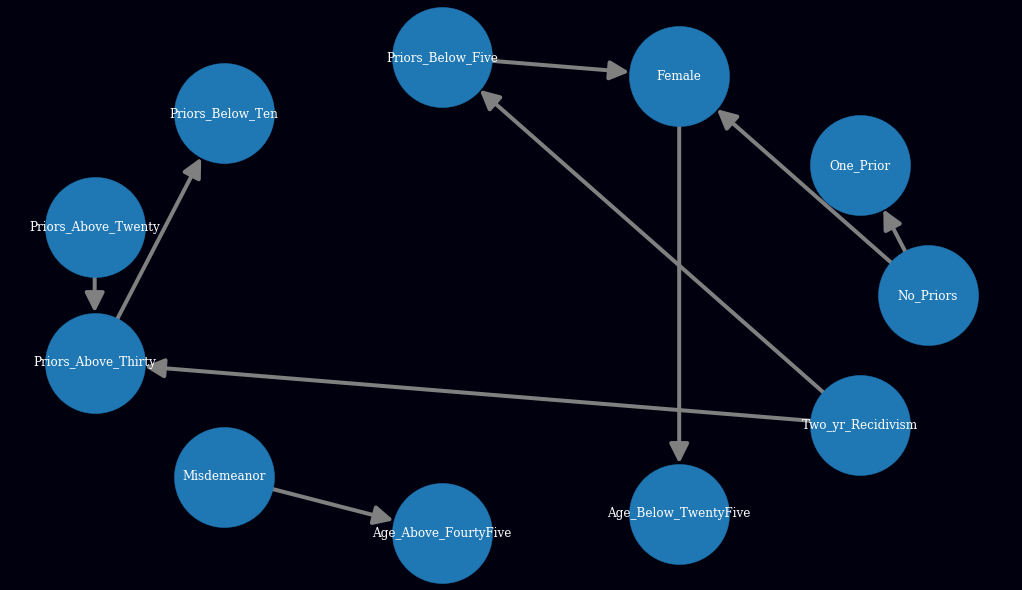

In [10]:
%matplotlib inline
fig = plt.figure(figsize=(14, 8))
nx.draw(G, labels = labels, edge_color ="grey", node_size = 10000, arrowsize=40, font_color="white", 
        width=4, pos = nx.shell_layout(G), font_family="serif")
fig.set_facecolor("#00000F")
plt.show()

In [11]:
# Bayesian Network With Race
XYTrain_Race_array = XYTrain_Race.values
XYTest_Race_array = XYTest_Race.values
model_Race = BayesianNetwork.from_samples(XYTrain_Race_array, algorithm="exact")
H = nx.DiGraph()
for i, node in enumerate(model_Race.structure, start=1):
    for edge in node:
        H.add_edge(i, edge)
names_race = XYTrain_Race.columns
labels_race = {i+1:names_race[i] for i in range(len(names_race))}

# Function to output probability of reoffending based on our model
def prob_reoffend2(sample):
    data = list(sample)
    data[-1] = 1
    p_1 = model_Race.probability(data)
    data[-1] = 0
    p_0 = model_Race.probability(data)
    return p_1 / (p_0 + p_1)

# Function to predict (binary) whether person will reoffend based on our model
def pred_reoffend2(sample):
    data = list(sample)
    data[-1] = None
    return model_Race.predict([data])[0][-1]

print("Bayesian Network With Race:")
train_predictions = [pred_reoffend2(row) for row in XYTrain_Race_array]
print("Training Accuracy: {:.4f}".format(accuracy_score(yTrain, train_predictions)))
test_predictions = [pred_reoffend2(row) for row in XYTest_Race_array]
print("Testing Accuracy: {:.4f}".format(accuracy_score(yTest, test_predictions)))

Bayesian Network With Race:
Training Accuracy: 0.6536
Testing Accuracy: 0.6645


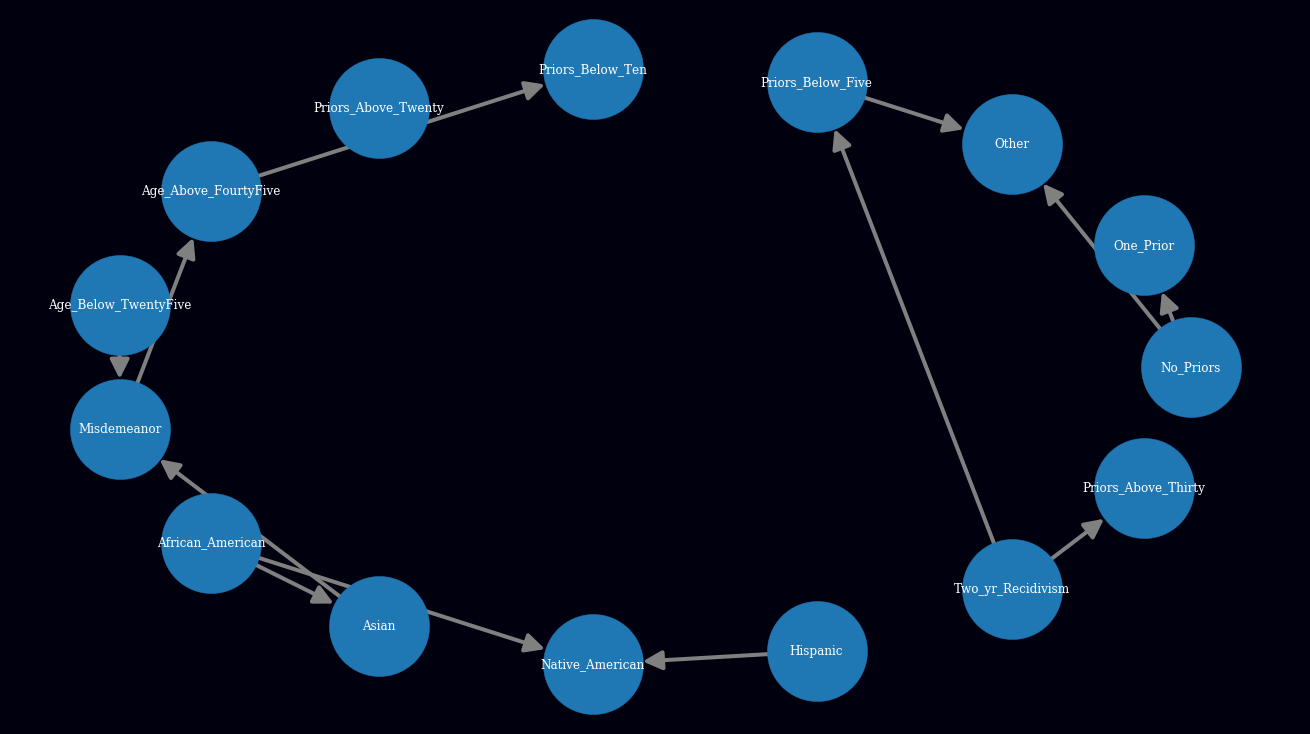

In [12]:
%matplotlib inline
fig = plt.figure(figsize=(18, 10))
nx.draw(H, labels = labels_race, edge_color ="grey", node_size = 10000, arrowsize=40, font_color="white", 
        width=4, pos = nx.shell_layout(H), font_family="serif")
fig.set_facecolor("#00000F")
plt.show()

## 4. Error Analysis: Race and Misclassification
Since the models that did not consider race were just as good as those that did, we'll just look at the race-blind models here. Our goal is to analyze how race is related to errors in classification. For the COMPAS algorithm, ProPublica found that Black defendants were more likely to be classified as _likely to reoffend_ and then not reoffend than whites (_false positives_), while whites were more likely than Blacks to be classified as _unlikely to reoffend_, and then go on to reoffend (_false negatives_).

In [13]:
# Segment training data by race
df_train_af_am = df_train[df_train.African_American == 1]
XTrain_af_am = df_train_af_am.loc[:,no_race_cols]
yTrain_af_am = df_train_af_am.loc[:, 'Two_yr_Recidivism']
XYTrain_af_am = df_train_af_am.loc[:, no_race_cols + ['Two_yr_Recidivism']]

df_train_asian = df_train[df_train.Asian == 1]
XTrain_asian = df_train_asian.loc[:,no_race_cols]
yTrain_asian = df_train_asian.loc[:, 'Two_yr_Recidivism']
XYTrain_asian = df_train_asian.loc[:, no_race_cols + ['Two_yr_Recidivism']]

df_train_hisp = df_train[df_train.Hispanic == 1]
XTrain_hisp = df_train_hisp.loc[:,no_race_cols]
yTrain_hisp = df_train_hisp.loc[:, 'Two_yr_Recidivism']
XYTrain_hisp = df_train_hisp.loc[:, no_race_cols + ['Two_yr_Recidivism']]

df_train_native = df_train[df_train.Native_American == 1]
XTrain_native = df_train_native.loc[:,no_race_cols]
yTrain_native = df_train_native.loc[:, 'Two_yr_Recidivism']
XYTrain_native = df_train_native.loc[:, no_race_cols + ['Two_yr_Recidivism']]

df_train_white = df_train[(df_train.African_American == 0) & (df_train.Asian == 0) & 
                          (df_train.Hispanic == 0) & (df_train.Native_American == 0) & (df_train.Other == 0)]
XTrain_white = df_train_white.loc[:,no_race_cols]
yTrain_white = df_train_white.loc[:, 'Two_yr_Recidivism']
XYTrain_white = df_train_white.loc[:, no_race_cols + ['Two_yr_Recidivism']]


df_train_other = df_train[df_train.Other == 1]
XTrain_other = df_train_other.loc[:,no_race_cols]
yTrain_other = df_train_other.loc[:, 'Two_yr_Recidivism']
XYTrain_other = df_train_other.loc[:, no_race_cols + ['Two_yr_Recidivism']]

# Segment testing data by race
# Segment training data by race
df_test_af_am = df_test[df_test.African_American == 1]
XTest_af_am = df_test_af_am.loc[:,no_race_cols]
yTest_af_am = df_test_af_am.loc[:, 'Two_yr_Recidivism']
XYTest_af_am = df_test_af_am.loc[:, no_race_cols + ['Two_yr_Recidivism']]

df_test_asian = df_test[df_test.Asian == 1]
XTest_asian = df_test_asian.loc[:,no_race_cols]
yTest_asian = df_test_asian.loc[:, 'Two_yr_Recidivism']
XYTest_asian = df_test_asian.loc[:, no_race_cols + ['Two_yr_Recidivism']]

df_test_hisp = df_test[df_test.Hispanic == 1]
XTest_hisp = df_test_hisp.loc[:,no_race_cols]
yTest_hisp = df_test_hisp.loc[:, 'Two_yr_Recidivism']
XYTest_hisp = df_test_hisp.loc[:, no_race_cols + ['Two_yr_Recidivism']]

df_test_native = df_test[df_test.Native_American == 1]
XTest_native = df_test_native.loc[:,no_race_cols]
yTest_native = df_test_native.loc[:, 'Two_yr_Recidivism']
XYTest_native = df_test_native.loc[:, no_race_cols + ['Two_yr_Recidivism']]

df_test_white = df_test[(df_test.African_American == 0) & (df_test.Asian == 0) & 
                          (df_test.Hispanic == 0) & (df_test.Native_American == 0) & (df_test.Other == 0)]
XTest_white = df_test_white.loc[:,no_race_cols]
yTest_white = df_test_white.loc[:, 'Two_yr_Recidivism']
XYTest_white = df_test_white.loc[:, no_race_cols + ['Two_yr_Recidivism']]


df_test_other = df_test[df_test.Other == 1]
XTest_other = df_test_other.loc[:,no_race_cols]
yTest_other = df_test_other.loc[:, 'Two_yr_Recidivism']
XYTest_other = df_test_other.loc[:, no_race_cols + ['Two_yr_Recidivism']]

In [14]:
# Function that returns false positive and false negative rate
def analyze_errors(true, prediction):
    true = true.values
    if len(true) != len(prediction):
        print("Error! Lengths do not match.")
        return
    false_p = 0
    false_n = 0
    p = 0
    n = 0
    for i in range(len(true)):
        if prediction[i] == 1: p += 1
        if prediction[i] == 0: n += 1
        if true[i] < prediction[i]: false_p += 1
        if true[i] > prediction[i]: false_n += 1
    print("Population Size: {}".format(len(true)))
    print("Accuracy: {:.1f}% | False Positives: {:.1f}% | False Negatives: {:.1f}%".format(
        100 - (false_p + false_n)/len(true) * 100, false_p / len(true) * 100, false_n / len(true) * 100))
    print("   {:.1f}% were predicted to reoffend. {:.1f}% of those predicted to reoffend did not.".format(
        p/len(true) * 100, false_p/p * 100))
    print("   {:.1f}% were predicted not to reoffend. {:.1f}% of those predicted not to reoffend did.\n".format(
        n/len(true) * 100, false_n/n * 100))
    return ((len(true) - false_p - false_n) / len(true), false_p / len(true), false_n / len(true),
           false_p / p, false_n / n)

In [15]:
# Analyze errors of logistic regression on testing data
print("Training Error Analysis for Logistic Regression:")
print("--African American--")
pred = lr_noRace.predict(XTrain_af_am)
acc, fp, fn, prate, nrate = analyze_errors(yTrain_af_am, pred)
print("--Asian--")
pred = lr_noRace.predict(XTrain_asian)
acc, fp, fn, prate, nrate = analyze_errors(yTrain_asian, pred)
print("--Hispanic--")
pred = lr_noRace.predict(XTrain_hisp)
acc, fp, fn, prate, nrate = analyze_errors(yTrain_hisp, pred)
print("--Native American--")
pred = lr_noRace.predict(XTrain_native)
acc, fp, fn, prate, nrate = analyze_errors(yTrain_native, pred)
print("--White--")
pred = lr_noRace.predict(XTrain_white)
acc, fp, fn, prate, nrate = analyze_errors(yTrain_white, pred)
print("--Other--")
pred = lr_noRace.predict(XTrain_other)
acc, fp, fn, prate, nrate = analyze_errors(yTrain_other, pred)


# Analyze errors of logistic regression on testing data
print("\nTesting Error Analysis for Logistic Regression:")
print("--African American--")
pred = lr_noRace.predict(XTest_af_am)
acc, fp, fn, prate, nrate = analyze_errors(yTest_af_am, pred)
print("--Asian--")
pred = lr_noRace.predict(XTest_asian)
acc, fp, fn, prate, nrate = analyze_errors(yTest_asian, pred)
print("--Hispanic--")
pred = lr_noRace.predict(XTest_hisp)
acc, fp, fn, prate, nrate = analyze_errors(yTest_hisp, pred)
print("--Native American--")
pred = lr_noRace.predict(XTest_native)
acc, fp, fn, prate, nrate = analyze_errors(yTest_native, pred)
print("--White--")
pred = lr_noRace.predict(XTest_white)
acc, fp, fn, prate, nrate = analyze_errors(yTest_white, pred)
print("--Other--")
pred = lr_noRace.predict(XTest_other)
acc, fp, fn, prate, nrate = analyze_errors(yTest_other, pred)

Training Error Analysis for Logistic Regression:
--African American--
Population Size: 2375
Accuracy: 65.1% | False Positives: 14.1% | False Negatives: 20.7%
   39.1% were predicted to reoffend. 36.2% of those predicted to reoffend did not.
   60.9% were predicted not to reoffend. 34.0% of those predicted not to reoffend did.

--Asian--
Population Size: 18
Accuracy: 66.7% | False Positives: 22.2% | False Negatives: 11.1%
   61.1% were predicted to reoffend. 36.4% of those predicted to reoffend did not.
   38.9% were predicted not to reoffend. 28.6% of those predicted not to reoffend did.

--Hispanic--
Population Size: 377
Accuracy: 69.8% | False Positives: 11.9% | False Negatives: 18.3%
   38.7% were predicted to reoffend. 30.8% of those predicted to reoffend did not.
   61.3% were predicted not to reoffend. 29.9% of those predicted not to reoffend did.

--Native American--
Population Size: 5
Accuracy: 60.0% | False Positives: 20.0% | False Negatives: 20.0%
   40.0% were predicted to r

In [16]:
# Analyze errors of CORELS on training data
print("Training Error Analysis for CORELS:")
print("--African American--")
pred = corels_no_race.predict(XTrain_af_am)
acc, fp, fn, prate, nrate = analyze_errors(yTrain_af_am, pred)
print("--Asian--")
pred = corels_no_race.predict(XTrain_asian)
acc, fp, fn, prate, nrate = analyze_errors(yTrain_asian, pred)
print("--Hispanic--")
pred = corels_no_race.predict(XTrain_hisp)
acc, fp, fn, prate, nrate = analyze_errors(yTrain_hisp, pred)
print("--Native American--")
pred = corels_no_race.predict(XTrain_native)
acc, fp, fn, prate, nrate = analyze_errors(yTrain_native, pred)
print("--White--")
pred = corels_no_race.predict(XTrain_white)
acc, fp, fn, prate, nrate = analyze_errors(yTrain_white, pred)
print("--Other--")
pred = corels_no_race.predict(XTrain_other)
acc, fp, fn, prate, nrate = analyze_errors(yTrain_other, pred)

# Analyze errors of CORELS on testing data
print("\nTesting Error Analysis for CORELS:")
print("--African American--")
pred = corels_no_race.predict(XTest_af_am)
acc, fp, fn, prate, nrate = analyze_errors(yTest_af_am, pred)
print("--Asian--")
pred = corels_no_race.predict(XTest_asian)
acc, fp, fn, prate, nrate = analyze_errors(yTest_asian, pred)
print("--Hispanic--")
pred = corels_no_race.predict(XTest_hisp)
acc, fp, fn, prate, nrate = analyze_errors(yTest_hisp, pred)
print("--Native American--")
pred = corels_no_race.predict(XTest_native)
acc, fp, fn, prate, nrate = analyze_errors(yTest_native, pred)
print("--White--")
pred = corels_no_race.predict(XTest_white)
acc, fp, fn, prate, nrate = analyze_errors(yTest_white, pred)
print("--Other--")
pred = corels_no_race.predict(XTest_other)
acc, fp, fn, prate, nrate = analyze_errors(yTest_other, pred)

Training Error Analysis for CORELS:
--African American--
Population Size: 2375
Accuracy: 65.4% | False Positives: 15.5% | False Negatives: 19.1%
   42.1% were predicted to reoffend. 36.8% of those predicted to reoffend did not.
   57.9% were predicted not to reoffend. 32.9% of those predicted not to reoffend did.

--Asian--
Population Size: 18
Accuracy: 61.1% | False Positives: 27.8% | False Negatives: 11.1%
   66.7% were predicted to reoffend. 41.7% of those predicted to reoffend did not.
   33.3% were predicted not to reoffend. 33.3% of those predicted not to reoffend did.

--Hispanic--
Population Size: 377
Accuracy: 69.0% | False Positives: 13.8% | False Negatives: 17.2%
   41.6% were predicted to reoffend. 33.1% of those predicted to reoffend did not.
   58.4% were predicted not to reoffend. 29.5% of those predicted not to reoffend did.

--Native American--
Population Size: 5
Accuracy: 60.0% | False Positives: 20.0% | False Negatives: 20.0%
   40.0% were predicted to reoffend. 50.0

In [17]:
# Analyze errors of Bayes Net on training data
print("Training Error Analysis for Bayesian Network:")
print("--African American--")
pred = [pred_reoffend_no_race(row) for row in XYTrain_af_am.values]
acc, fp, fn, prate, nrate = analyze_errors(yTrain_af_am, pred)
print("--Asian--")
pred = [pred_reoffend_no_race(row) for row in XYTrain_asian.values]
acc, fp, fn, prate, nrate = analyze_errors(yTrain_asian, pred)
print("--Hispanic--")
pred = [pred_reoffend_no_race(row) for row in XYTrain_hisp.values]
acc, fp, fn, prate, nrate = analyze_errors(yTrain_hisp, pred)
print("--Native American--")
pred = [pred_reoffend_no_race(row) for row in XYTrain_native.values]
acc, fp, fn, prate, nrate = analyze_errors(yTrain_native, pred)
print("--White--")
pred = [pred_reoffend_no_race(row) for row in XYTrain_white.values]
acc, fp, fn, prate, nrate = analyze_errors(yTrain_white, pred)
print("--Other--")
pred = [pred_reoffend_no_race(row) for row in XYTrain_other.values]
acc, fp, fn, prate, nrate = analyze_errors(yTrain_other, pred)

# Analyze errors of Bayes Net on testing data
print("\Testing Error Analysis for Bayesian Network:")
print("--African American--")
pred = [pred_reoffend_no_race(row) for row in XYTest_af_am.values]
acc, fp, fn, prate, nrate = analyze_errors(yTest_af_am, pred)
print("--Asian--")
pred = [pred_reoffend_no_race(row) for row in XYTest_asian.values]
acc, fp, fn, prate, nrate = analyze_errors(yTest_asian, pred)
print("--Hispanic--")
pred = [pred_reoffend_no_race(row) for row in XYTest_hisp.values]
acc, fp, fn, prate, nrate = analyze_errors(yTest_hisp, pred)
print("--Native American--")
pred = [pred_reoffend_no_race(row) for row in XYTest_native.values]
acc, fp, fn, prate, nrate = analyze_errors(yTest_native, pred)
print("--White--")
pred = [pred_reoffend_no_race(row) for row in XYTest_white.values]
acc, fp, fn, prate, nrate = analyze_errors(yTest_white, pred)
print("--Other--")
pred = [pred_reoffend_no_race(row) for row in XYTest_other.values]
acc, fp, fn, prate, nrate = analyze_errors(yTest_other, pred)

Training Error Analysis for Bayesian Network:
--African American--
Population Size: 2375
Accuracy: 65.2% | False Positives: 14.3% | False Negatives: 20.5%
   39.4% were predicted to reoffend. 36.2% of those predicted to reoffend did not.
   60.6% were predicted not to reoffend. 33.9% of those predicted not to reoffend did.

--Asian--
Population Size: 18
Accuracy: 66.7% | False Positives: 22.2% | False Negatives: 11.1%
   61.1% were predicted to reoffend. 36.4% of those predicted to reoffend did not.
   38.9% were predicted not to reoffend. 28.6% of those predicted not to reoffend did.

--Hispanic--
Population Size: 377
Accuracy: 69.8% | False Positives: 11.9% | False Negatives: 18.3%
   38.7% were predicted to reoffend. 30.8% of those predicted to reoffend did not.
   61.3% were predicted not to reoffend. 29.9% of those predicted not to reoffend did.

--Native American--
Population Size: 5
Accuracy: 60.0% | False Positives: 20.0% | False Negatives: 20.0%
   40.0% were predicted to reof